In [97]:
# Pandas and Numpy libraries
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings 
warnings.filterwarnings( "ignore")
%matplotlib inline

### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.

In [98]:
df=pd.read_csv("Election_Data 01.csv")

In [99]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [100]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [101]:
df.shape

(1525, 10)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


In [103]:
df.dtypes

Unnamed: 0                  int64
vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [104]:
df.isnull().sum()

Unnamed: 0                 0
vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,763.000000,440.373894,1.0,382.0,763.0,1144.0,1525.0
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [106]:
df.isnull().sum().any()

False

In [107]:
df.duplicated().sum()

0

In [108]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [109]:
df = df.drop('Unnamed: 0', axis=1)

In [110]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [111]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 8


In [112]:
df.shape

(1525, 9)

In [113]:
df.drop_duplicates(inplace=True)

In [114]:
df.shape

(1517, 9)

In [115]:
df.duplicated().sum()

0

In [116]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (1517, 9)
After (1517, 9)


In [117]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [118]:
df.skew(axis = 0)

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

In [119]:
for column in df.columns:
    if df[column].dtype == 'int64':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

AGE :  70
93     1
91     1
90     1
92     2
87     3
      ..
54    37
47    38
35    38
49    39
37    42
Name: age, Length: 70, dtype: int64


ECONOMIC.COND.NATIONAL :  5
1     37
5     82
2    256
4    538
3    604
Name: economic.cond.national, dtype: int64


ECONOMIC.COND.HOUSEHOLD :  5
1     65
5     92
2    280
4    435
3    645
Name: economic.cond.household, dtype: int64


BLAIR :  5
3      1
1     97
5    152
2    434
4    833
Name: Blair, dtype: int64


HAGUE :  5
3     37
5     73
1    233
4    557
2    617
Name: Hague, dtype: int64


EUROPE :  11
2      77
7      86
10    101
1     109
8     111
9     111
5     123
4     126
3     128
6     207
11    338
Name: Europe, dtype: int64


POLITICAL.KNOWLEDGE :  4
1     38
3    249
0    454
2    776
Name: political.knowledge, dtype: int64




In [120]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

VOTE :  2
Conservative     460
Labour          1057
Name: vote, dtype: int64


GENDER :  2
male      709
female    808
Name: gender, dtype: int64




In [121]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [123]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,54.241266,3.245221,3.137772,3.335531,2.749506,6.740277,1.540541
std,15.701741,0.881792,0.931069,1.174772,1.232479,3.299043,1.084417
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [124]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)
    

['vote', 'gender']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

In [125]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [126]:
df.dtypes

vote                       object
age                         int64
economic.cond.national      int64
economic.cond.household     int64
Blair                       int64
Hague                       int64
Europe                      int64
political.knowledge         int64
gender                     object
dtype: object

In [127]:
df.shape

(1517, 9)

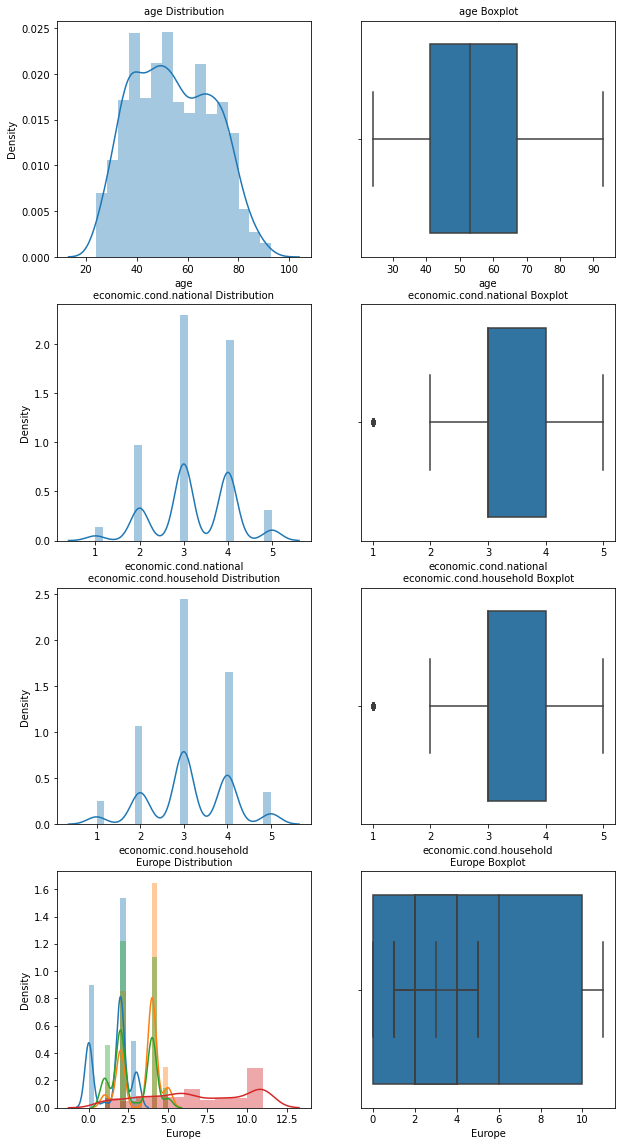

In [128]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(10,20)
a = sns.distplot(df['age'] , ax=axes[0][0])
a.set_title("age Distribution",fontsize=10)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[0][1])
a.set_title("age Boxplot",fontsize=10)

a = sns.distplot(df['economic.cond.national'] , ax=axes[1][0])
a.set_title("economic.cond.national Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.national'] , orient = "v" , ax=axes[1][1])
a.set_title("economic.cond.national Boxplot",fontsize=10)


a = sns.distplot(df['economic.cond.household'] , ax=axes[2][0])
a.set_title("economic.cond.household Distribution",fontsize=10)

a = sns.boxplot(df['economic.cond.household'] , orient = "v" , ax=axes[2][1])
a.set_title("economic.cond.household Boxplot",fontsize=10)




a = sns.distplot(df['political.knowledge'] , ax=axes[3][0])
a.set_title("political.knowledge Distribution",fontsize=10)

a = sns.boxplot(df['political.knowledge'] , orient = "v" , ax=axes[3][1])
a.set_title("political.knowledge Boxplot",fontsize=10)

a = sns.distplot(df['Blair'] , ax=axes[3][0])
a.set_title("Blair Distribution",fontsize=10)

a = sns.boxplot(df['Blair'] , orient = "v" , ax=axes[3][1])
a.set_title("Blair Boxplot",fontsize=10)

a = sns.distplot(df['Hague'] , ax=axes[3][0])
a.set_title("Hague Distribution",fontsize=10)

a = sns.boxplot(df['Hague'] , orient = "v" , ax=axes[3][1])
a.set_title("Hague Boxplot",fontsize=10)

a = sns.distplot(df['Europe'] , ax=axes[3][0])
a.set_title("Europe Distribution",fontsize=10)

a = sns.boxplot(df['Europe'] , orient = "v" , ax=axes[3][1])
a.set_title("Europe Boxplot",fontsize=10)


plt.show()

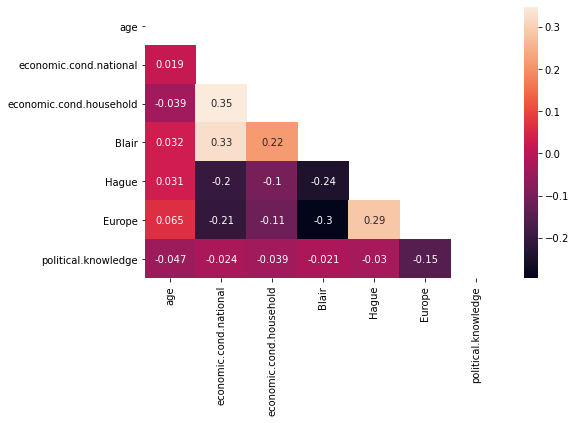

In [129]:
plt.figure(figsize=(8,5));
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,annot=True,mask=mask);

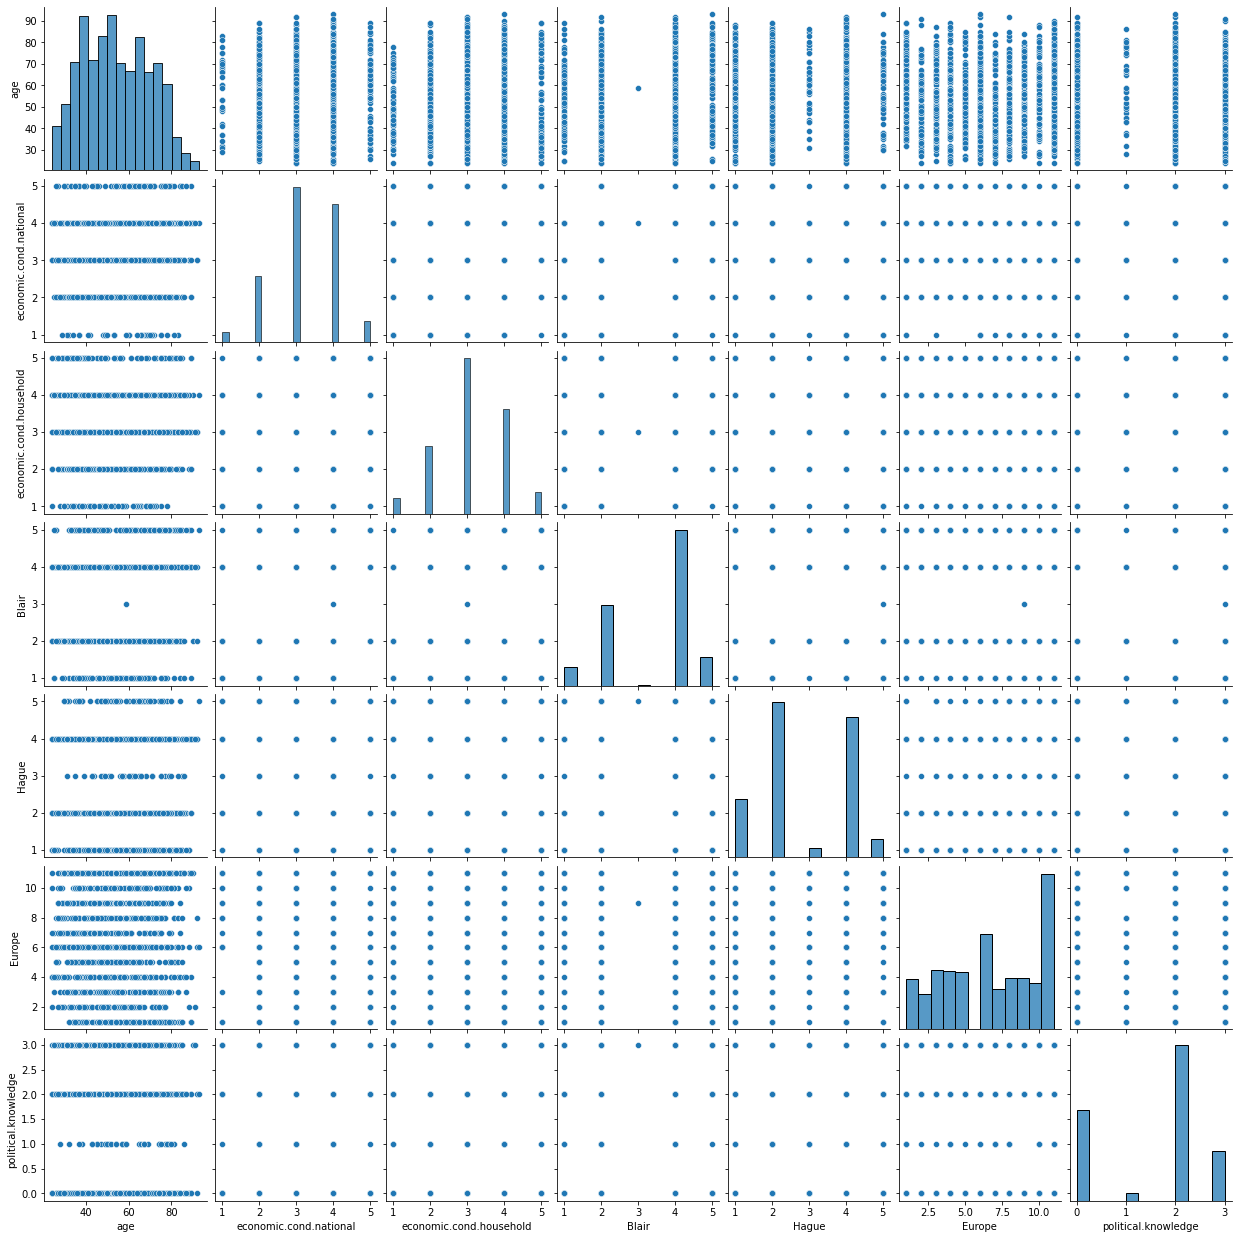

In [130]:
sns.pairplot(df);

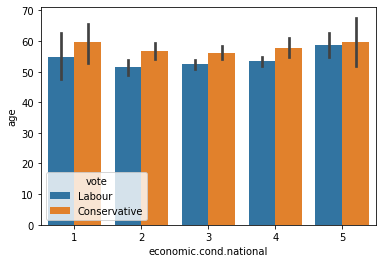

In [131]:
sns.barplot(df['economic.cond.national'], df['age'], hue=df['vote']);

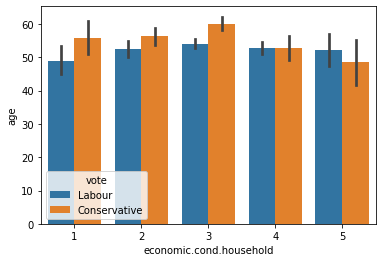

In [132]:
sns.barplot(df['economic.cond.household'], df['age'], hue=df['vote']);

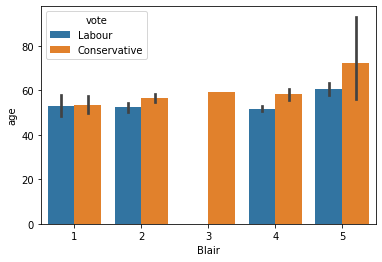

In [133]:
sns.barplot(df['Blair'], df['age'], hue=df['vote']);

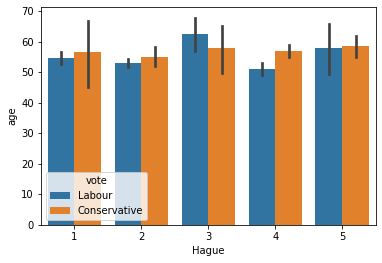

In [134]:
sns.barplot(df['Hague'], df['age'], hue=df['vote']);

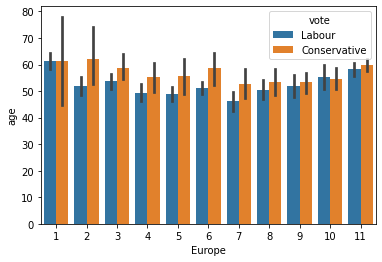

In [135]:
sns.barplot(df['Europe'], df['age'], hue=df['vote']);

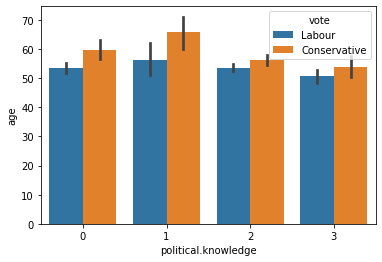

In [136]:
sns.barplot(df['political.knowledge'], df['age'], hue=df['vote']);

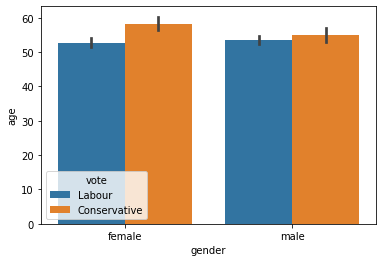

In [137]:
sns.barplot(df['gender'], df['age'], hue=df['vote']);

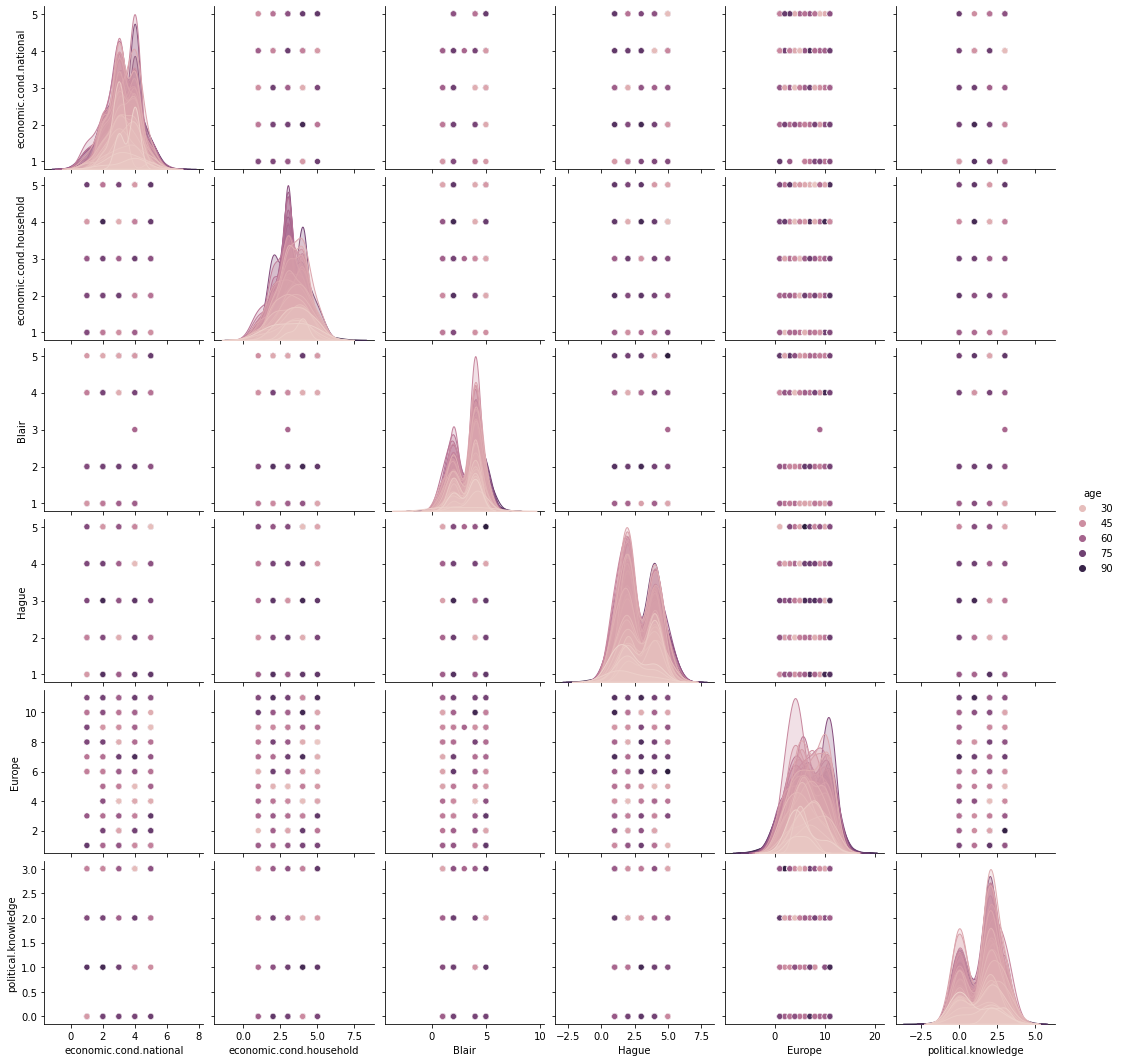

In [138]:
sns.pairplot(df,hue="age")

In [139]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [140]:
lr,ur=remove_outlier(df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]>ur,ur,df["economic.cond.national"])
df["economic.cond.national"]=np.where(df["economic.cond.national"]<lr,lr,df["economic.cond.national"])

In [141]:
lr,ur=remove_outlier(df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]>ur,ur,df["economic.cond.household"])
df["economic.cond.household"]=np.where(df["economic.cond.household"]<lr,lr,df["economic.cond.household"])

<AxesSubplot:>

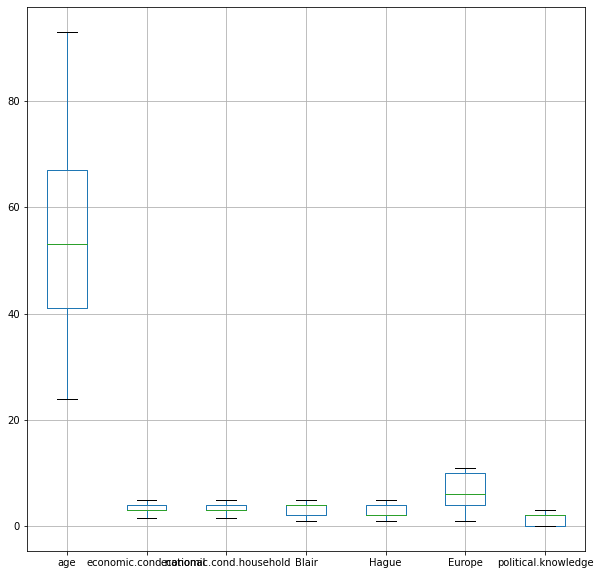

In [142]:
plt.figure(figsize=(10,10))
df.boxplot(vert=1)

### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).

# Data preprocessing

#### Describe for numerical and categorical columns

In [143]:
df.columns

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')

In [144]:
df.dtypes

vote                        object
age                          int64
economic.cond.national     float64
economic.cond.household    float64
Blair                        int64
Hague                        int64
Europe                       int64
political.knowledge          int64
gender                      object
dtype: object

In [145]:
cat1=['vote','gender']

In [146]:
df1= pd.get_dummies(df,columns=cat1,drop_first=True)

In [147]:
df1.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,vote_Labour,gender_male
0,43,3.0,3.0,4,1,2,2,1,0
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,1,0
4,41,2.0,2.0,1,1,6,2,1,1


In [154]:
df1.vote_Labour.value_counts()

1    1057
0     460
Name: vote_Labour, dtype: int64

In [156]:
df1.gender_male.value_counts()

0    808
1    709
Name: gender_male, dtype: int64

In [157]:
df1.dtypes

age                          int64
economic.cond.national     float64
economic.cond.household    float64
Blair                        int64
Hague                        int64
Europe                       int64
political.knowledge          int64
vote_Labour                  uint8
gender_male                  uint8
dtype: object

**Train-Test Split**
Split X and y into training and test set in 70:30 ratio with random_state=1

In [159]:
# Arrange data into independent variables and dependent variables
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [160]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [161]:
X_train.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
991,34,2.0,4.0,1,4,11,2,0
1274,40,4.0,3.0,4,4,6,0,1
649,61,4.0,3.0,4,4,7,2,0
677,47,3.0,3.0,4,2,11,0,1
538,44,5.0,3.0,4,2,8,0,1


In [162]:
y_train.head()

,vote_Labour
991,0
1274,1
649,0
677,1
538,1


In [163]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


In [164]:
y.head()

,vote_Labour
0,1
1,1
2,1
3,1
4,1


In [165]:
X_train.shape

(1061, 8)

In [166]:
X_test.shape

(456, 8)

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

In [167]:
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [171]:
# Fit the Logistic Regression model
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [172]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Model Evaluation

In [173]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [174]:
# Accuracy - Testing Data
model.score(X_test, y_test)

0.8289473684210527

### AUC and ROC for the training data

In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.890


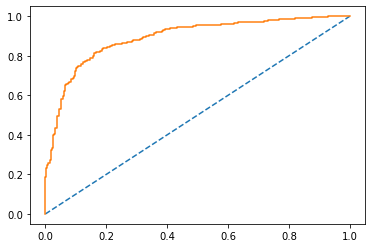

In [176]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.890


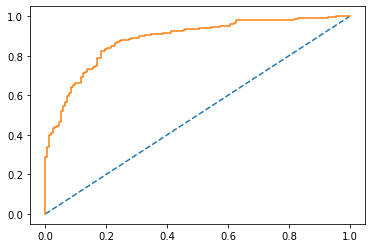

In [177]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [178]:
confusion_matrix(y_train, ytrain_predict)

array([[197, 110],
       [ 66, 688]], dtype=int64)

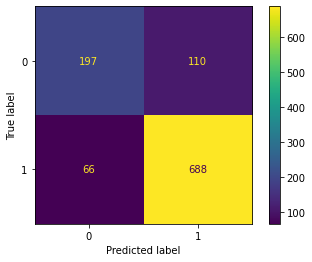

In [179]:
plot_confusion_matrix(model,X_train,y_train);

In [180]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



### Confusion Matrix for test data

In [181]:
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 36, 267]], dtype=int64)

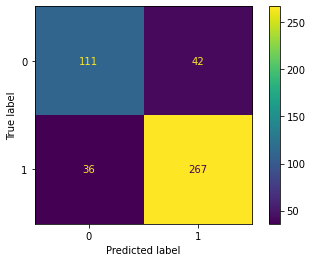

In [182]:
plot_confusion_matrix(model,X_test,y_test);

In [183]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



## Applying GridSearchCV for Logistic Regression

In [184]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [185]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [186]:
from sklearn.model_selection import train_test_split,GridSearchCV
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [187]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [188]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001} 

LogisticRegression(max_iter=10000, n_jobs=2)


In [189]:
best_model = grid_search.best_estimator_

In [190]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [191]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.425878,0.574122
1,0.153033,0.846967
2,0.006702,0.993298
3,0.839536,0.160464
4,0.065117,0.934883


              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



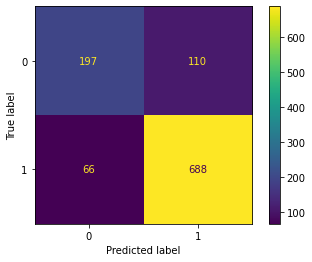

In [192]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



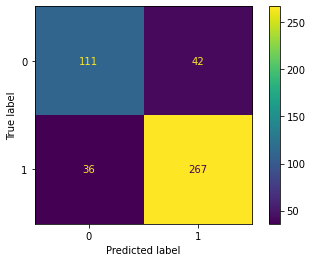

In [193]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

### Predicting on Training and Test dataset

In [255]:
 invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

SyntaxError: invalid syntax (<ipython-input-255-f715cfc47177>, line 1)

In [256]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [257]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [258]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.831140350877193

In [201]:
#LR

### LDA Model

In [202]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [203]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [204]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

Test Data Classification  & Trail Data Classification 

In [205]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [206]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [207]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [208]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [209]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.831140350877193

### Probability prediction for the training and test data

In [210]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [211]:
pred_prob_train[:,1]

array([0.04973366, 0.92243861, 0.69491333, ..., 0.77989739, 0.78940481,
       0.98130104])

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


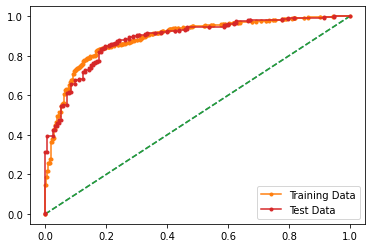

In [212]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# How to change the cut-off values for maximum accuracy?

Traning data

0.1 

Accuracy Score 0.7615
F1 Score 0.8547 

Confusion Matrix


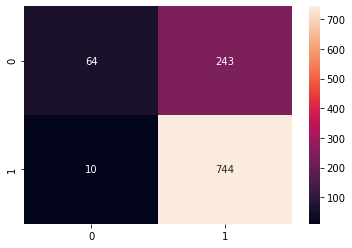

0.2 

Accuracy Score 0.7936
F1 Score 0.8696 

Confusion Matrix


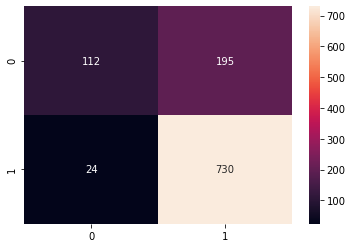

0.3 

Accuracy Score 0.8143
F1 Score 0.8794 

Confusion Matrix


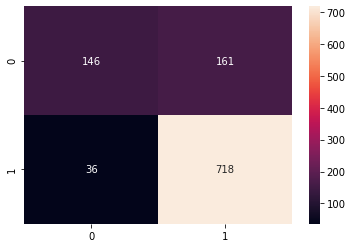

0.4 

Accuracy Score 0.8351
F1 Score 0.89 

Confusion Matrix


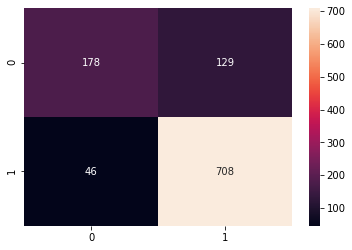

0.5 

Accuracy Score 0.8341
F1 Score 0.8862 

Confusion Matrix


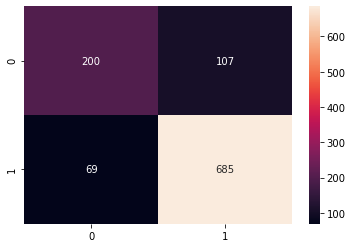

0.6 

Accuracy Score 0.8294
F1 Score 0.8794 

Confusion Matrix


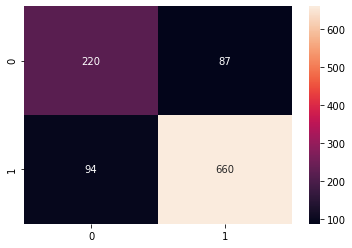

0.7 

Accuracy Score 0.8303
F1 Score 0.875 

Confusion Matrix


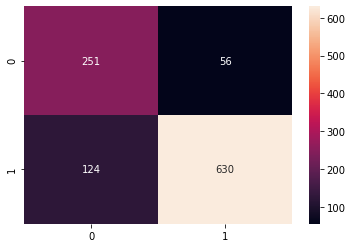

0.8 

Accuracy Score 0.7879
F1 Score 0.8339 

Confusion Matrix


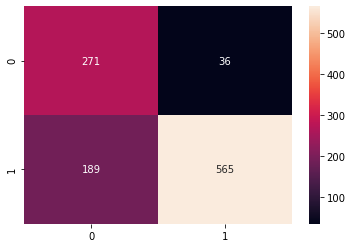

0.9 

Accuracy Score 0.6984
F1 Score 0.739 

Confusion Matrix


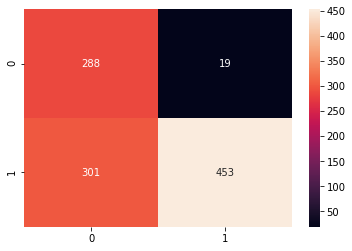

In [213]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

Testing data 

0.1 

Accuracy Score 0.7281
F1 Score 0.8278 

Confusion Matrix


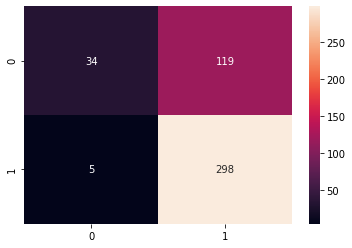

0.2 

Accuracy Score 0.7675
F1 Score 0.8464 

Confusion Matrix


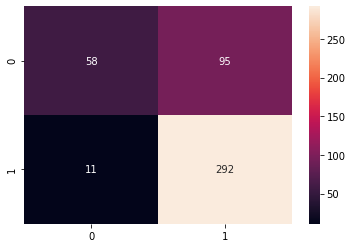

0.3 

Accuracy Score 0.8004
F1 Score 0.8627 

Confusion Matrix


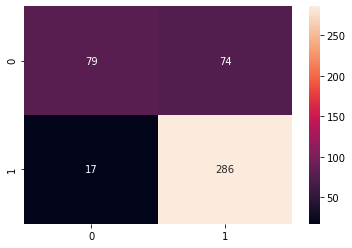

0.4 

Accuracy Score 0.8289
F1 Score 0.8766 

Confusion Matrix


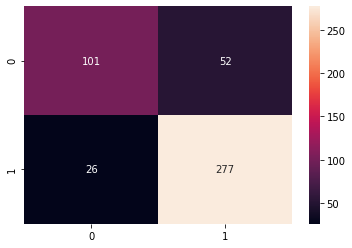

0.5 

Accuracy Score 0.8311
F1 Score 0.8744 

Confusion Matrix


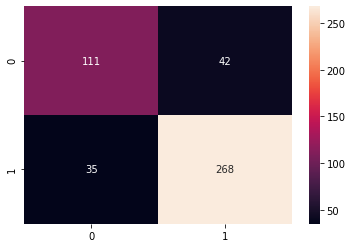

0.6 

Accuracy Score 0.8311
F1 Score 0.8697 

Confusion Matrix


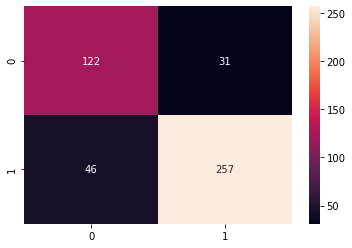

0.7 

Accuracy Score 0.807
F1 Score 0.8462 

Confusion Matrix


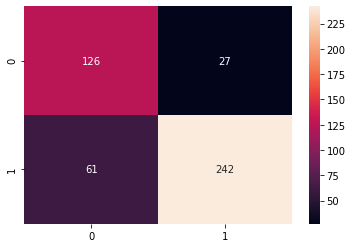

0.8 

Accuracy Score 0.7719
F1 Score 0.8081 

Confusion Matrix


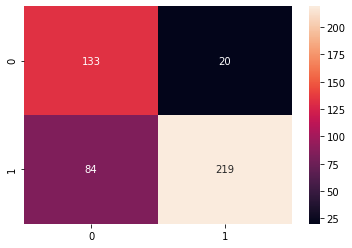

0.9 

Accuracy Score 0.7171
F1 Score 0.7435 

Confusion Matrix


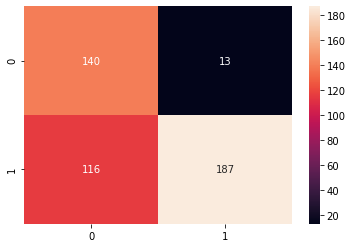

In [214]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

## Inferences

Note :

                                                         Precison : tells us how many predictions are actually positive
                                                         
                                                                    out of all the total positive predicted.
                                                         
                                                         Recall   : how many observations of positive class are actually 
                                                         
                                                                    predicted as positive. 

### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [259]:
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [260]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

**Gaussian Naive Bayes**

In [261]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [262]:
NB_model = GaussianNB()
# fit the model
NB_model.fit(X_train,y_train)

GaussianNB()

**Performance Matrix on train data set**

In [263]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))     ## classification_report

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



**Performance Matrix on test data set**

In [264]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**Accuracy of our Gaussian Naive Bayes model**

In [265]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [266]:
NB_model.score(X_test, y_test)

0.8223684210526315

In [368]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



## KNN Model

In [270]:
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [271]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [272]:
from scipy.stats import zscore
import warnings 

In [273]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
# fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

## Performance Matrix on train data set

In [274]:

y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



## Performance Matrix on test data set

In [275]:

y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



**Default value n_neighbors=5, lets check the performance for K=7**

In [282]:
KNN_model=KNeighborsClassifier(n_neighbors=5)
# fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [283]:
## Performance Matrix on train data set
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [284]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


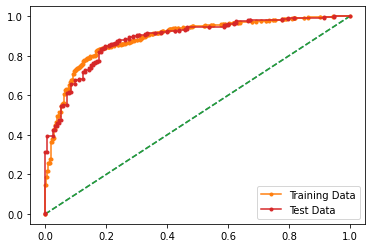

In [285]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**Run the KNN with no of neighbours to be 1,3,5..19 and *Find the optimal number of neighbours from K=1,3,5,7....19 using the Mis classification error**

Hint: Misclassification error **(MCE) = 1 - Test accuracy score.** Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE

In [286]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2192982456140351,
 0.21052631578947367,
 0.1842105263157895,
 0.17543859649122806,
 0.19298245614035092,
 0.19517543859649122,
 0.19736842105263153,
 0.19298245614035092,
 0.20175438596491224,
 0.19517543859649122]

In [366]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



**Plot misclassification error vs k (with k value on X-axis) using matplotli**

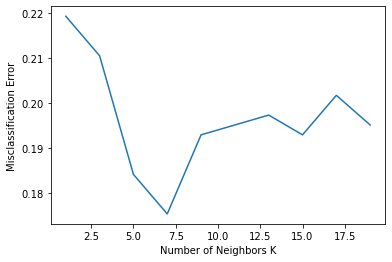

In [287]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting. 

In [290]:
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [291]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

### Naive Bayes Model

In [292]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [293]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [294]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))


0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [295]:
y_test.value_counts()

vote_Labour
1              303
0              153
dtype: int64

In [296]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



In [297]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [298]:
## Performance Matrix on train data set
y_train_predict = LDA_model.predict(X_train)
model_score = LDA_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8341187558906692
[[200 107]
 [ 69 685]]
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



In [299]:
## Performance Matrix on test data set
y_test_predict = LDA_model.predict(X_test)
model_score = LDA_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[111  42]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



## Ada Boost

In [300]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [301]:
## Performance Matrix on train data set
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [302]:
## Performance Matrix on test data set
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



In [364]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


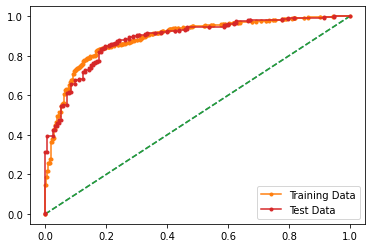

In [367]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Gradient Boosting

In [303]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [304]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



In [305]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



## KNN Model

In [306]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [307]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8539114043355325
[[204 103]
 [ 52 702]]
              precision    recall  f1-score   support

           0       0.80      0.66      0.72       307
           1       0.87      0.93      0.90       754

    accuracy                           0.85      1061
   macro avg       0.83      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



In [308]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


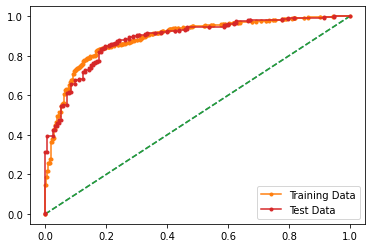

In [309]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

## Random Forest

In [310]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [311]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [312]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.831140350877193
[[104  49]
 [ 28 275]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73       153
           1       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



In [362]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



## Bagging

In [313]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [314]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



In [315]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



In [363]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


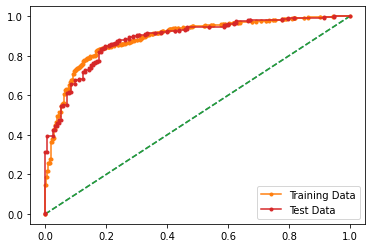

In [365]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.

In [316]:
X = df1.drop("vote_Labour",axis=1)  ## Features
y = df1[["vote_Labour"]]  ## Target

In [317]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=1)

In [318]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [319]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

## Model Evaluation

In [320]:
# Accuracy - Training Data
model.score(X_train, y_train)


0.8341187558906692

In [321]:
# Accuracy - Testing Data
model.score(X_test, y_test)

0.8289473684210527

### AUC and ROC for the training data

In [322]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

AUC: 0.890


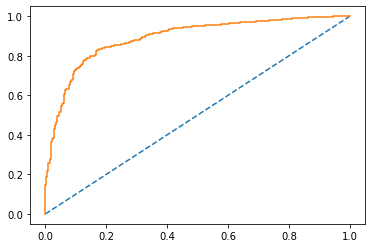

In [356]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.890


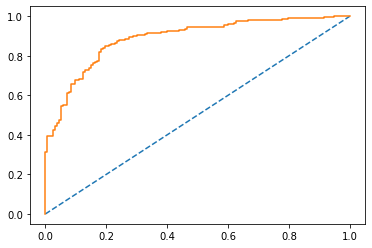

In [357]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Confusion Matrix for the training data

In [325]:
confusion_matrix(y_train, ytrain_predict)

array([[197, 110],
       [ 66, 688]], dtype=int64)

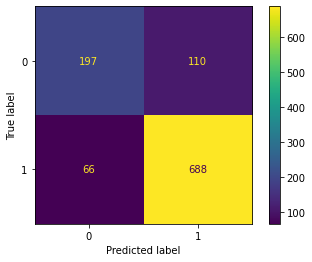

In [326]:
plot_confusion_matrix(model,X_train,y_train);

### Confusion Matrix for test data

In [327]:
confusion_matrix(y_test, ytest_predict)

array([[111,  42],
       [ 36, 267]], dtype=int64)

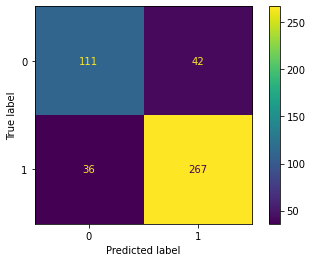

In [328]:
plot_confusion_matrix(model,X_test,y_test);

### Classification Report Train data Set 

In [329]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



### Classification Report Test data Set 

In [330]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



In [358]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



### LDA Model

In [331]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [332]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [333]:
pred_class_train = model.predict(X_train)
pred_class_test = model.predict(X_test)

### Classification Report Training and Testing data set

In [334]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



In [335]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [336]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [337]:
# Accuracy - Training Data
model.score(X_train, y_train)

0.8341187558906692

In [338]:
# Accuracy - Testing Data
model.score(X_test, y_test)

0.831140350877193

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


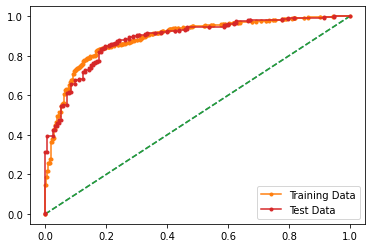

In [339]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

### Traning data - Set And Confusion Matrix

In [359]:
## Performance Matrix on train data set
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

1.0
[[307   0]
 [  0 754]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       307
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1061
   macro avg       1.00      1.00      1.00      1061
weighted avg       1.00      1.00      1.00      1061



0.1 

Accuracy Score 0.7615
F1 Score 0.8547 

Confusion Matrix


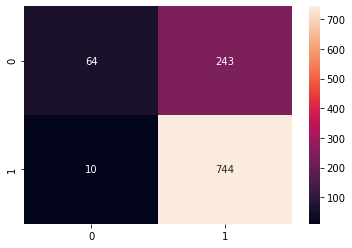

0.2 

Accuracy Score 0.7936
F1 Score 0.8696 

Confusion Matrix


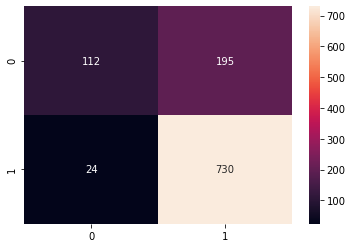

0.3 

Accuracy Score 0.8143
F1 Score 0.8794 

Confusion Matrix


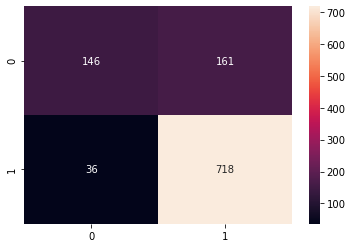

0.4 

Accuracy Score 0.8351
F1 Score 0.89 

Confusion Matrix


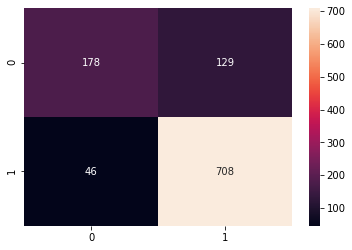

0.5 

Accuracy Score 0.8341
F1 Score 0.8862 

Confusion Matrix


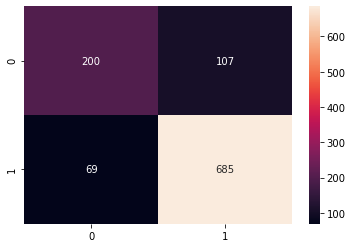

0.6 

Accuracy Score 0.8294
F1 Score 0.8794 

Confusion Matrix


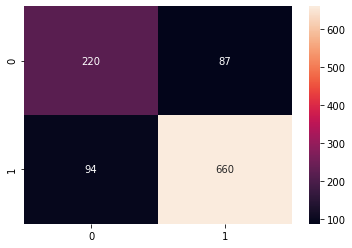

0.7 

Accuracy Score 0.8303
F1 Score 0.875 

Confusion Matrix


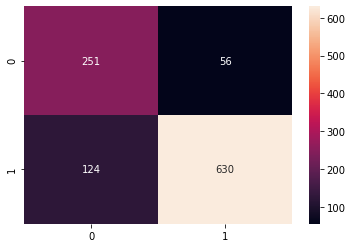

0.8 

Accuracy Score 0.7879
F1 Score 0.8339 

Confusion Matrix


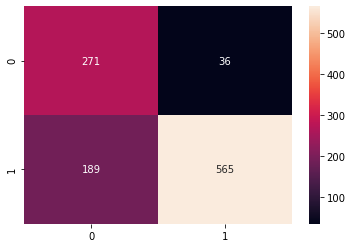

0.9 

Accuracy Score 0.6984
F1 Score 0.739 

Confusion Matrix


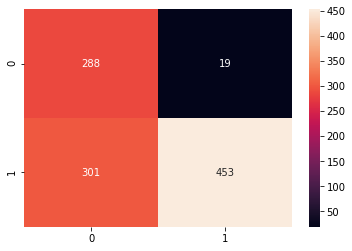

In [340]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

### Testing Data Set And Confusion Matrix

In [360]:
## Performance Matrix on test data set
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8201754385964912
[[108  45]
 [ 37 266]]
              precision    recall  f1-score   support

           0       0.74      0.71      0.72       153
           1       0.86      0.88      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



0.1 

Accuracy Score 0.7281
F1 Score 0.8278 

Confusion Matrix


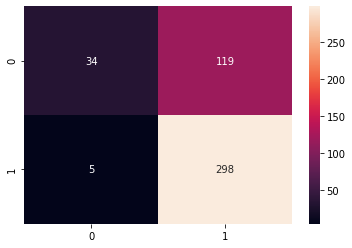

0.2 

Accuracy Score 0.7675
F1 Score 0.8464 

Confusion Matrix


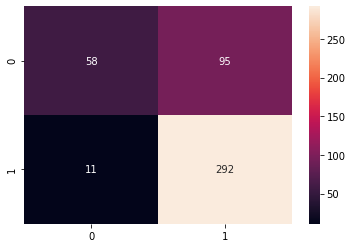

0.3 

Accuracy Score 0.8004
F1 Score 0.8627 

Confusion Matrix


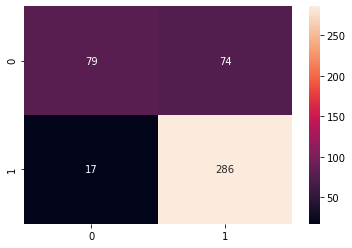

0.4 

Accuracy Score 0.8289
F1 Score 0.8766 

Confusion Matrix


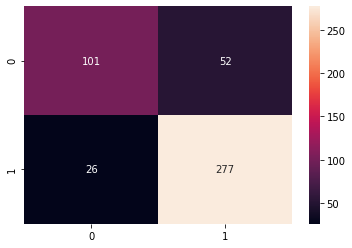

0.5 

Accuracy Score 0.8311
F1 Score 0.8744 

Confusion Matrix


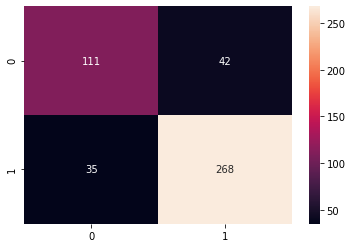

0.6 

Accuracy Score 0.8311
F1 Score 0.8697 

Confusion Matrix


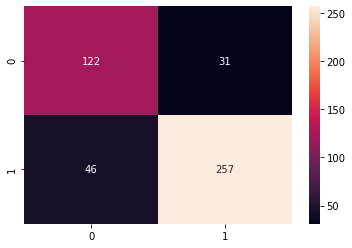

0.7 

Accuracy Score 0.807
F1 Score 0.8462 

Confusion Matrix


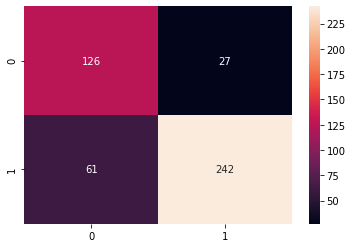

0.8 

Accuracy Score 0.7719
F1 Score 0.8081 

Confusion Matrix


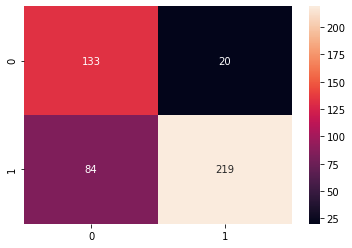

0.9 

Accuracy Score 0.7171
F1 Score 0.7435 

Confusion Matrix


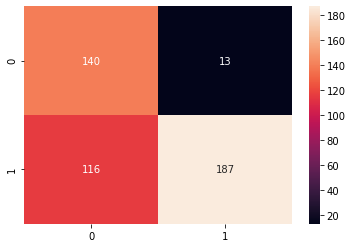

In [341]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

**Gaussian Naive Bayes**

In [342]:
NB_model = GaussianNB()
# fit the model
NB_model.fit(X_train,y_train)

GaussianNB()

**Performance Matrix on train data set**

In [343]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict))  

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



**Performance Matrix on test data set**

In [344]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report

0.8223684210526315
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



**Accuracy of our Gaussian Naive Bayes model**

In [345]:
NB_model.score(X_train, y_train)

0.8341187558906692

In [346]:
NB_model.score(X_test, y_test)

0.8223684210526315

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


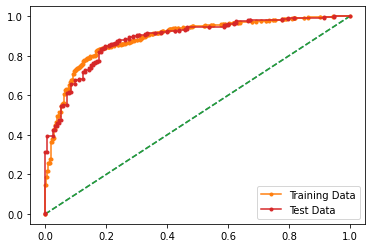

In [347]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [348]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



## KNN Model

In [349]:
from scipy.stats import zscore
import warnings 

In [350]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
# fit the model
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [351]:
#Performance Matrix Train data Set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))          ## confusion_matrix
print(metrics.classification_report(y_train, y_train_predict)) 

0.8341187558906692
[[212  95]
 [ 81 673]]
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061



In [352]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)                      ## Accuracy
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))          ## confusion_matrix
print(metrics.classification_report(y_test, y_test_predict))     ## classification_report

0.8157894736842105
[[ 99  54]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.77      0.65      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.82      0.81       456



AUC: 0.890


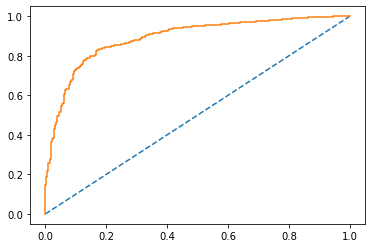

In [353]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.890


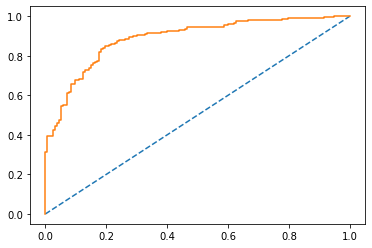

In [354]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

AUC for the Training Data: 0.890
AUC for the Test Data: 0.888


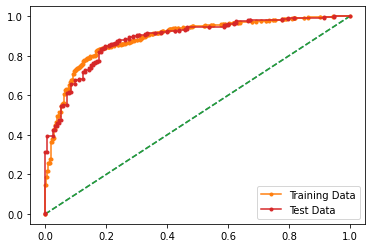

In [355]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [361]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



### 1.8 Based on these predictions, what are the insights? 

Detail Report observation is mentioned at project report.

### 2.1 Find the number of characters, words, and sentences for the mentioned documents.

In [403]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib

In [404]:
## Let us check the version of the various libraries
print('Numpy version:',np.__version__)
print('Pandas version:',pd.__version__)
print('Regular Expression version:',re.__version__)
print('Natural Language Tool Kit version:',nltk.__version__)
print('Matplotlib version:',matplotlib.__version__)

Numpy version: 1.19.2
Pandas version: 1.2.4
Regular Expression version: 2.2.1
Natural Language Tool Kit version: 3.5
Matplotlib version: 3.3.2


In [405]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural 

[nltk_data] Downloading package inaugural to C:\Users\sankesh
[nltk_data]     nagrare\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


In [406]:
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

In [407]:
df_Roosevelt= inaugural.raw('1941-Roosevelt.txt')


In [408]:
type(df_Roosevelt)
type(df_Kennedy)
type(df_Nixon)

str

In [409]:
split_df_Roosevelt=df_Roosevelt.split('\n\n') 

In [410]:
type(split_df_Roosevelt)

list

In [411]:
df_text_Roosevelt = pd.Dataframe(split_df_Roosevelt)

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [412]:
df_text_Roosevelt.columns=['speech']

NameError: name 'df_text_Roosevelt' is not defined

In [413]:
df_Roosevelt['speech'] = df_Roosevelt['speech'].str.replace('[^\w\s]','')
#\w: Returns a match where the string contains any word characters (characters from a to Z, digits from 0-9, and the underscore _ character)
#\s: Returns a match where the string contains a white space character.
#[^]: Returns a match for any character EXCEPT what is written after it.
Apple_tweets


TypeError: string indices must be integers